In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D #Biểu đồ 3 chiều
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import datetime
from scipy import stats
from scipy.stats import skew

**GIẢI THÍCH DỮ LIỆU:**

**ĐƠN HÀNG**

**1.order_id:** ID duy nhất của đơn hàng.

**2.customer_id:** ID duy nhất của khách hàng liên quan đến đơn hàng.

**3.order_status:** Trạng thái hiện tại của đơn hàng

**4.order_purchase_timestamp:** Thời điểm khách hàng đặt hàng.

**5.order_approved_at:** Thời điểm đơn hàng được chấp nhận/phê duyệt.

**6.order_delivered_carrier_date:** Thời điểm đơn hàng được giao cho nhà vận chuyển.

**7.order_delivered_customer_date:** Thời điểm đơn hàng được giao đến khách hàng.

**8.order_estimated_delivery_date:** Thời gian dự kiến giao hàng cho khách hàng.
Thông tin về đánh giá

**REVIEW**

**9.review_id:** ID duy nhất của bài đánh giá.

**10.review_score:** Điểm số đánh giá (thường từ 1 đến 5).

**11.review_creation_date:** Ngày tạo bài đánh giá.

**12.review_answer_timestamp:** Thời gian phản hồi lại bài đánh giá (thường bởi nhà bán hàng hoặc hệ thống).

**THÔNG TIN THANH TOÁN**

**13.payment_sequential:** Số thứ tự của giao dịch thanh toán (nếu có nhiều lần thanh toán cho một đơn hàng).

**14.payment_type:** Phương thức thanh toán

**15.payment_installments:** Số lượng kỳ hạn thanh toán.

**16.payment_value:** Giá trị thanh toán.

**THÔNG TIN KHÁCH HÀNG**

**17.customer_unique_id:** ID duy nhất của khách hàng (không thay đổi qua các đơn hàng).

**18.customer_zip_code_prefix:** Mã bưu điện của khách hàng.

**19.customer_city:** Thành phố của khách hàng.

**20.customer_state:** Bang của khách hàng.

**THÔNG TIN VỀ MẶT HÀNG**

**21.order_item_id:** ID duy nhất của mặt hàng trong đơn hàng (dùng để phân biệt các mặt hàng khác nhau trong cùng một đơn hàng).

**22.product_id:** ID duy nhất của sản phẩm.

**23.seller_id:** ID duy nhất của người bán.

**24.shipping_limit_date:** Thời hạn tối đa để giao hàng từ kho đến nhà vận chuyển.

**25.price:** Giá của sản phẩm.

**26.freight_value:** Phí vận chuyển của sản phẩm.

**THÔNG TIN SẢN PHẨM**

**27.product_category_name:** Tên danh mục sản phẩm.

**28.product_weight_g:** Trọng lượng sản phẩm (gram).

**29.product_length_cm: Chiều dài sản phẩm (cm).**

**30.product_height_cm: Chiều cao sản phẩm (cm).**

**31.product_width_cm: Chiều rộng sản phẩm (cm).**

**THÔNG TIN NGƯỜI BÁN**

**32.seller_zip_code_prefix:** Mã bưu điện của người bán.

**33.seller_city:** Thành phố của người bán.

**34.seller_state:** Bang của người bán.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Brazilian E-Commerce Public Dataset/RFM: Changed Dataset/Brazilian-E-Commerce-Public-Dataset-Full-Changed.csv')

In [ ]:
#Chuyển đổi một số columns từ dạng 'Objects' sang 'Datetime':
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
data['order_approved_at'] = pd.to_datetime(data['order_approved_at'], format='%Y-%m-%d %H:%M:%S')
data['order_delivered_carrier_date'] = pd.to_datetime(data['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M:%S')
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')
data['review_creation_date'] = pd.to_datetime(data['review_creation_date'], format='%Y-%m-%d %H:%M:%S')
data['review_answer_timestamp'] = pd.to_datetime(data['review_answer_timestamp'], format='%Y-%m-%d %H:%M:%S')
data['shipping_limit_date'] = pd.to_datetime(data['shipping_limit_date'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
#Có 2 giá trị là 'delivered' và 'canceled'. Ở đây ta xóa đi những mặt hàng bị hủy:
data = data[data['order_status'] == 'delivered']

In [ ]:
#Xóa đi những columns không thực sự cần thiết cho bài toán RFM:
data = data.drop(columns = ['order_status', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                            'order_estimated_delivery_date', 'review_id', 'review_score', 'review_creation_date', 'review_answer_timestamp',
                            'payment_installments', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'seller_id', 'shipping_limit_date',
                            'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix', 'seller_city', 'seller_state'])

In [ ]:
data

,order_id,customer_id,order_purchase_timestamp,payment_sequential,payment_type,payment_value,customer_unique_id,order_item_id,product_id,price,freight_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,1,credit_card,18.12,7c396fd4830fd04220f754e42b4e5bff,1,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,3,voucher,2.00,7c396fd4830fd04220f754e42b4e5bff,1,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2,voucher,18.59,7c396fd4830fd04220f754e42b4e5bff,1,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,1,credit_card,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,1,87285b34884572647811a353c7ac498a,29.99,7.78,utilidades_domesticas
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,2017-08-02 18:24:47,1,credit_card,37.77,ef0996a1a279c26e7ecbd737be23d235,1,87285b34884572647811a353c7ac498a,29.99,7.78,utilidades_domesticas
...,...,...,...,...,...,...,...,...,...,...,...,...
113211,5bacbd9f42bd029c3a296501224e193e,5a1470d43d8ad960d4199134d3df48e0,2018-08-10 21:14:35,1,credit_card,134.48,0b39f417a3c099ff0497346258e8d752,2,710e8b076db06c8e5343a9e23f0e3d83,44.99,22.25,esporte_lazer
113212,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,2018-07-01 10:23:10,1,boleto,93.13,2077f7ec37df79c62cc24b7b8f30e8c9,1,31ec3a565e06de4bdf9d2a511b822b4d,79.00,14.13,construcao_ferramentas_iluminacao
113213,735dce2d574afe8eb87e80a3d6229c48,d531d01affc2c55769f6b9ed410d8d3c,2018-07-24 09:46:27,1,debit_card,444.07,8cf3c6e1d2c8afaab2eda3fa01d4e3d2,1,1d187e8e7a30417fda31e85679d96f0f,399.00,45.07,moveis_decoracao
113214,25d2bfa43663a23586afd12f15b542e7,9d8c06734fde9823ace11a4b5929b5a7,2018-05-22 21:13:21,1,credit_card,244.02,e55e436481078787e32349cee9febf5e,1,6e1c2008dea1929b9b6c27fa01381e90,219.90,24.12,moveis_decoracao


**TÍNH RFM:**

**1.Recency:** Bộ dữ liệu này kết thúc vào khoảng cuối tháng 8/2018. Vậy ta sẽ dùng mốc thời gian là ngày 1/9/2018 để tính thời gian, bằng cách trừ đi cột 'order_purchase_timestamp'

**2.Frequency:** Ta sẽ tính tần xuất bằng Customer_unique_id.

**3.Monetary:** Ta sẽ tính bằng: Tổng của giá trị thanh toán 'payment_value' trừ đi số tiền vận chuyển 'freight_value'

***1.Recency:***

In [ ]:
#Sử dụng ngày 1/9/2018 làm mốc
reference_date = pd.to_datetime('2018-09-01 00:00:00')

#Dùng ngày 1/9/2018 trừ đi các ngày trên để tính thời gian:
data['Recency'] = (reference_date - data['order_purchase_timestamp']).dt.days

In [ ]:
#Ở đây ta chọn ra giá trị 'Recency' nhỏ nhất, ứng với thời điểm mua hàng gần đây nhất:
R_df = data.groupby('customer_unique_id')['Recency'].min().reset_index()
R_df

,customer_unique_id,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,113
1,0000b849f77a49e4a4ce2b2a4ca5be3f,116
2,0000f46a3911fa3c0805444483337064,539
3,0000f6ccb0745a6a4b88665a16c9f078,323
4,0004aac84e0df4da2b147fca70cf8255,290
...,...,...
91473,fffcf5a5ff07b0908bd4e2dbc735a684,449
91474,fffea47cd6d3cc0a88bd621562a9d061,264
91475,ffff371b4d645b6ecea244b27531430a,570
91476,ffff5962728ec6157033ef9805bacc48,121


***2.Frequency:***

In [ ]:
#Có thể thấy, có một số khách hàng đã mua nhiều hơn 1 đơn hàng.
F_df = data.groupby('customer_unique_id')['order_id'].count().reset_index()
F_df.rename(columns={'order_id': 'Frequency'}, inplace=True)
F_df

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
91473,fffcf5a5ff07b0908bd4e2dbc735a684,2
91474,fffea47cd6d3cc0a88bd621562a9d061,1
91475,ffff371b4d645b6ecea244b27531430a,1
91476,ffff5962728ec6157033ef9805bacc48,1


***3.Monetary***

*Công thức này cần xem lại, khác với Frequency và Recency, Monetary có sự phức tạp hơn*

In [ ]:
data['total_value'] = data['price'] + data['freight_value']

# Nhóm dữ liệu theo 'customer_unique_id' và tính tổng chi tiêu của mỗi khách hàng
M_df = data.groupby('customer_unique_id')['total_value'].sum().reset_index()

# Đổi tên cột để dễ hiểu hơn
M_df.rename(columns={'total_value': 'Monetary'}, inplace=True)
M_df

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
91473,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42
91474,fffea47cd6d3cc0a88bd621562a9d061,84.58
91475,ffff371b4d645b6ecea244b27531430a,112.46
91476,ffff5962728ec6157033ef9805bacc48,133.69


In [ ]:
#Hợp nhất 3 dataframe để thành bảng dữ liệu RFM:
RFM_df = pd.merge(R_df, F_df, on='customer_unique_id', how='inner')
RFM_df = pd.merge(RFM_df, M_df, on='customer_unique_id', how='inner')
RFM_df

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19
2,0000f46a3911fa3c0805444483337064,539,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,323,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,290,1,196.89
...,...,...,...,...
91473,fffcf5a5ff07b0908bd4e2dbc735a684,449,2,2067.42
91474,fffea47cd6d3cc0a88bd621562a9d061,264,1,84.58
91475,ffff371b4d645b6ecea244b27531430a,570,1,112.46
91476,ffff5962728ec6157033ef9805bacc48,121,1,133.69


**SKEWNESS cho dữ liệu RFM**

In [ ]:
# Tính skewness hiện tại cho từng cột của bộ dữ liệu
skewness_recency = skew(RFM_df['Recency'])
skewness_frequency = skew(RFM_df['Frequency'])
skewness_monetary_value = skew(RFM_df['Monetary'])

print("Skewness của cột Recency:", skewness_recency)
print("Skewness của cột Frequency:", skewness_frequency)
print("Skewness của cột Monetary:", skewness_monetary_value)

Skewness của cột Recency: 0.4512024397037631
Skewness của cột Frequency: 15.910404665844874
Skewness của cột Monetary: 11.170049379959236


<ipython-input-38-711de9911719>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM_df['Recency'], ax = ax[0])
<ipython-input-38-711de9911719>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM_df['Frequency'], ax = ax[1])
<ipython-input-38-711de9911719>:5: UserWarning: 

`distplot` is a depr

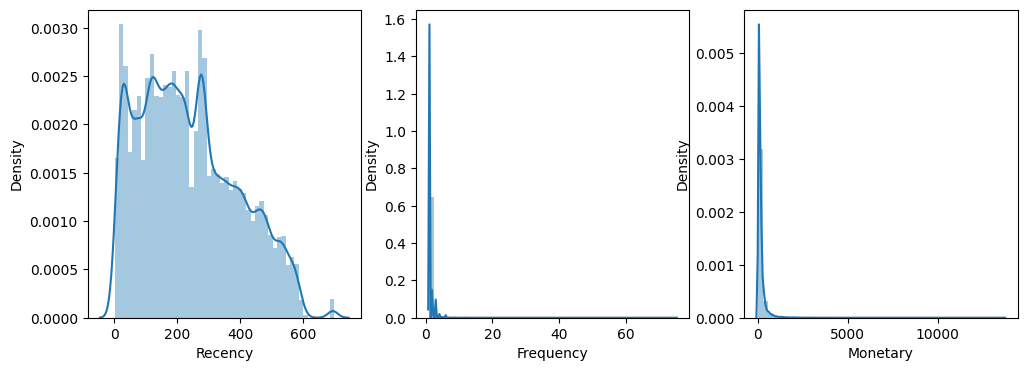

In [ ]:
#vẽ biểu đồ phân phối
fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.distplot(RFM_df['Recency'], ax = ax[0])
sns.distplot(RFM_df['Frequency'], ax = ax[1])
sns.distplot(RFM_df['Monetary'], ax = ax[2])
plt.show()

In [ ]:
def analyze_skewness(x):
    #Vẽ biểu đồ
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(RFM_df[x], ax=ax[0,0])
    sns.distplot(np.log(RFM_df[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(RFM_df[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(RFM_df[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()

    print(RFM_df[x].skew().round(2))  #Tinh Skewness ban đầu
    print(np.log(RFM_df[x]).skew().round(2))  #Tinh Skewness dùng hàm Log
    print(np.sqrt(RFM_df[x]).skew().round(2)) #Tinh Skewness với hàm Căn bậc 2
    print(pd.Series(stats.boxcox(RFM_df[x])[0]).skew().round(2))  #Tinh Skewness với hàm Box cox

<ipython-input-45-5174ea5dd7a0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM_df[x], ax=ax[0,0])
<ipython-input-45-5174ea5dd7a0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(RFM_df[x]), ax=ax[0,1])
<ipython-input-45-5174ea5dd7a0>:6: UserWarning: 

`distplot` is a deprecated fun

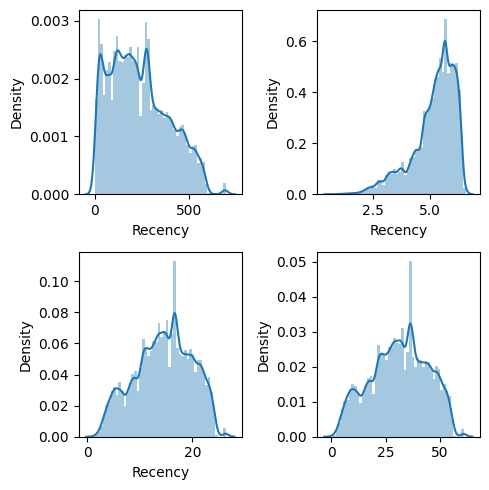

0.45
-1.19
-0.21
-0.15


In [ ]:
#Tính Skewness cho cột Recency (Tương tự với 2 cột còn lại)
analyze_skewness('Recency')

<ipython-input-45-5174ea5dd7a0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM_df[x], ax=ax[0,0])
<ipython-input-45-5174ea5dd7a0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(RFM_df[x]), ax=ax[0,1])
<ipython-input-45-5174ea5dd7a0>:6: UserWarning: 

`distplot` is a deprecated fun

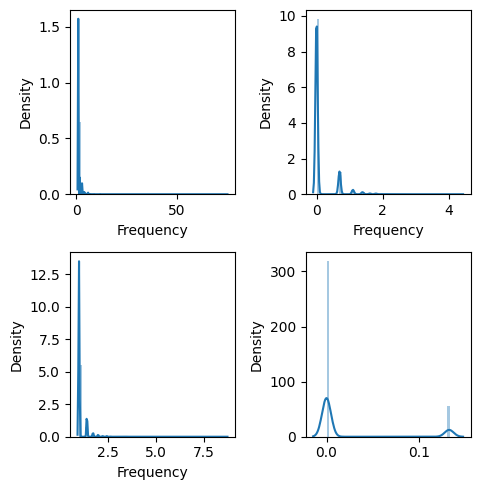

15.91
2.9
4.62
1.96


In [ ]:
analyze_skewness('Frequency')

<ipython-input-45-5174ea5dd7a0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM_df[x], ax=ax[0,0])
<ipython-input-45-5174ea5dd7a0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(RFM_df[x]), ax=ax[0,1])
<ipython-input-45-5174ea5dd7a0>:6: UserWarning: 

`distplot` is a deprecated fun

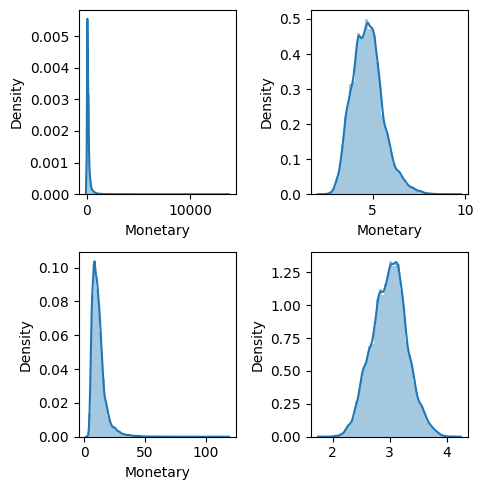

11.17
0.53
2.73
0.01


In [ ]:
analyze_skewness('Monetary')

***Chọn Box-cox vì hàm này cho ra kết quả gần 0 (đối xứng nhất):***

In [ ]:
#Chuyển đổi dữ liệu bằng Cox-box và Cube root
RFM_df_t = pd.DataFrame() #Tạo ra một dataframe mới với các giá trị của nó được tính từ các giá trị của data_customer
RFM_df_t['Recency'] = stats.boxcox(RFM_df['Recency'])[0]
RFM_df_t['Frequency'] = stats.boxcox(RFM_df['Frequency'])[0]
RFM_df_t['Monetary'] = pd.Series(np.cbrt(RFM_df['Monetary'])).values
RFM_df_t

,Recency,Frequency,Monetary
0,21.751251,0.000000,5.215878
1,22.086135,0.000000,3.007021
2,52.817864,0.000000,4.417766
3,39.662321,0.000000,3.520156
4,37.325439,0.000000,5.817565
...,...,...,...
91473,47.703959,0.132664,12.739222
91474,35.396181,0.000000,4.389576
91475,54.486248,0.000000,4.826875
91476,22.635498,0.000000,5.113281


In [ ]:
#Sử dụng Standard Scaler cho dữ liệu
scaler = StandardScaler()
scaler.fit(RFM_df_t)

RFM_df_t = scaler.transform(RFM_df_t)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

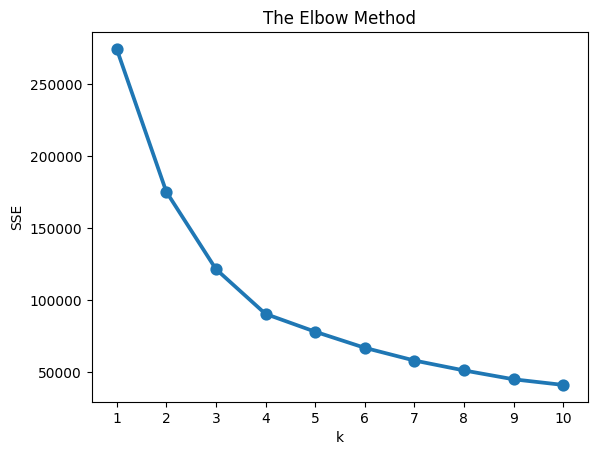

In [ ]:
#Phương pháp Elbow để tính số cụm phù hợp cho Kmeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(RFM_df_t)
    sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()


***Bài toán K-means với k=4***

In [ ]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(RFM_df_t)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [ ]:
RFM_df['Cluster'] = model.labels_
RFM_df.head()

,customer_unique_id,Recency,Frequency,Monetary,Cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19,2
2,0000f46a3911fa3c0805444483337064,539,1,86.22,1
3,0000f6ccb0745a6a4b88665a16c9f078,323,1,43.62,1
4,0004aac84e0df4da2b147fca70cf8255,290,1,196.89,1


In [ ]:
#Nhóm các giá trị dữ liệu theo từng Cluster tương ứng và tính trung bình của mỗi cluster đó theo 3 giá trị R, F, M
RFM_df.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean'
    }
).round(3) #Làm tròn 2 chữ số thập phân


,Recency,Frequency,Monetary
Cluster,,,
0,245.342,1.113,596.984
1,354.633,1.000,100.047
2,101.025,1.000,105.901
3,240.084,2.533,261.391


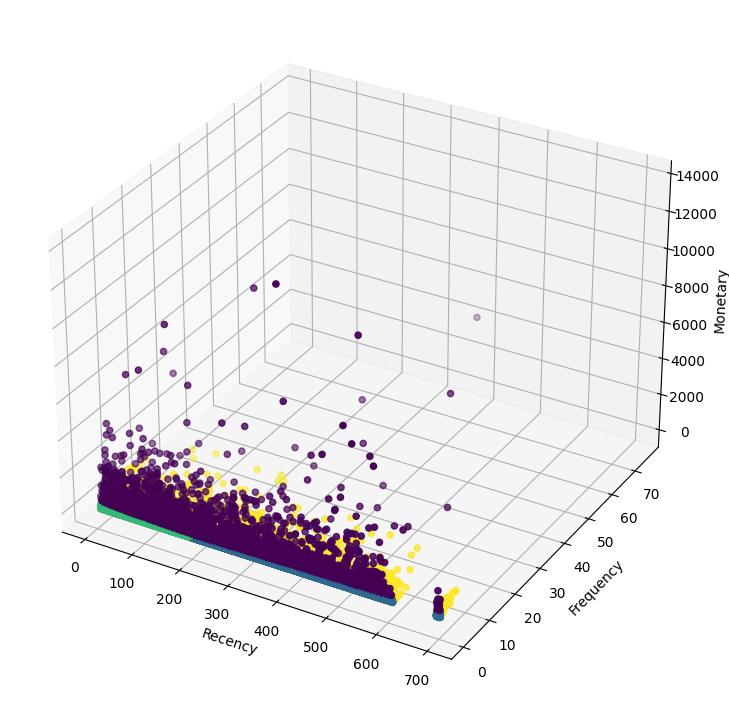

In [ ]:
#Vẽ thử biểu đồ xem phân phối của 3 cluster như thế nào
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Vẽ biểu đồ scatter 3D
ax.scatter(RFM_df['Recency'], RFM_df['Frequency'], RFM_df['Monetary'], c=RFM_df['Cluster'], cmap='viridis')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()